In [164]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, RepeatedKFold, cross_val_score
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics, svm
from sklearn.feature_selection import SelectKBest, f_regression

In [166]:
# Run the data preprocessing notebook
data = pd.read_csv('docs/Breast_Cancer_Dataset.csv')

In [168]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Preparation

In [171]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [173]:
data.shape

(569, 33)

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [177]:
# Drop ID Column
data = data.drop(['id','Unnamed: 32'], axis=1)

In [179]:
data['diagnosis'] = data['diagnosis'].replace({'M':1,'B':0})

C:\Users\fa_bi\AppData\Local\Temp\ipykernel_16964\770462572.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diagnosis'] = data['diagnosis'].replace({'M':1,'B':0})


In [181]:
# Check if Duplicated
data.duplicated().value_counts()

False    569
Name: count, dtype: int64

In [183]:
# There are not Na's in the data
for column in data:
    print(data[column].isna().value_counts())
    print(" ")

diagnosis
False    569
Name: count, dtype: int64
 
radius_mean
False    569
Name: count, dtype: int64
 
texture_mean
False    569
Name: count, dtype: int64
 
perimeter_mean
False    569
Name: count, dtype: int64
 
area_mean
False    569
Name: count, dtype: int64
 
smoothness_mean
False    569
Name: count, dtype: int64
 
compactness_mean
False    569
Name: count, dtype: int64
 
concavity_mean
False    569
Name: count, dtype: int64
 
concave points_mean
False    569
Name: count, dtype: int64
 
symmetry_mean
False    569
Name: count, dtype: int64
 
fractal_dimension_mean
False    569
Name: count, dtype: int64
 
radius_se
False    569
Name: count, dtype: int64
 
texture_se
False    569
Name: count, dtype: int64
 
perimeter_se
False    569
Name: count, dtype: int64
 
area_se
False    569
Name: count, dtype: int64
 
smoothness_se
False    569
Name: count, dtype: int64
 
compactness_se
False    569
Name: count, dtype: int64
 
concavity_se
False    569
Name: count, dtype: int64
 
concave point

In [185]:
# Data to be Normalized
numerical_cols = []
for column in data:
    stats= data[column].describe()
    if stats['min'] <-1.0 or stats['max']>1.0:
        numerical_cols.append(stats.name)
print(numerical_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst']


 Detecting outliers and visualizing the distribution of numerical variables:

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst']
radius_mean: 14 outliers detected


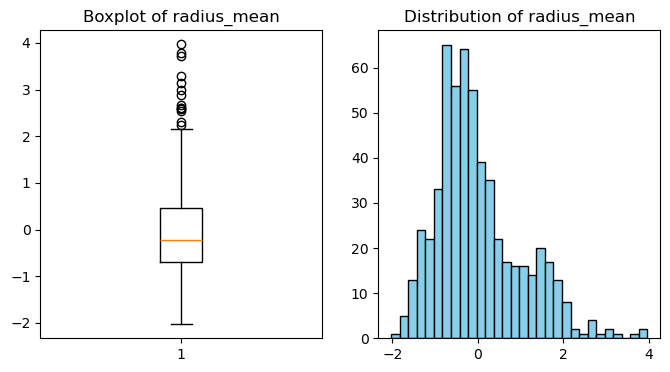

texture_mean: 7 outliers detected


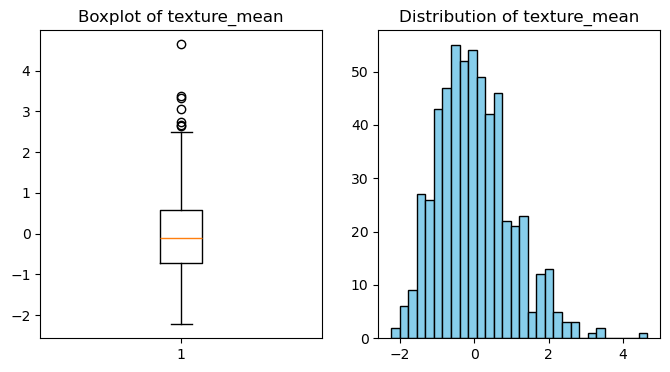

perimeter_mean: 13 outliers detected


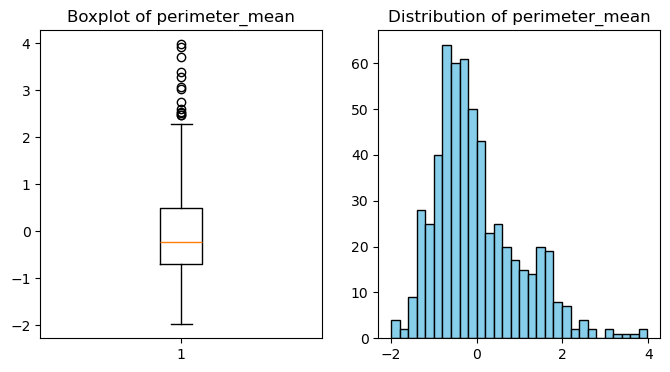

area_mean: 25 outliers detected


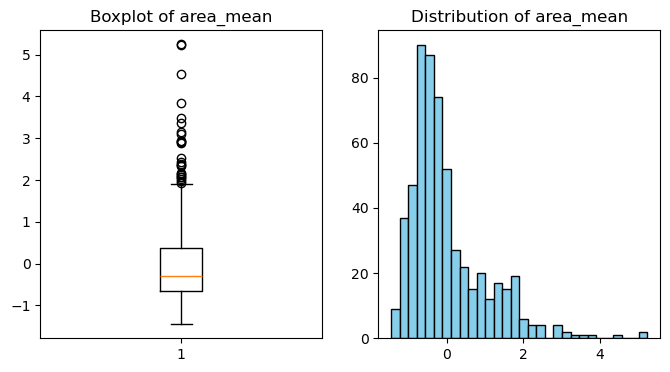

radius_se: 38 outliers detected


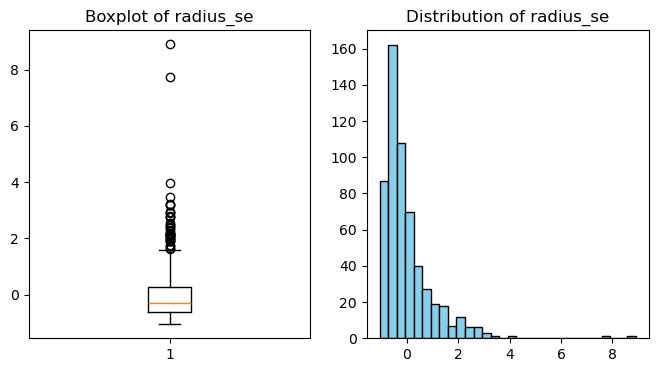

texture_se: 20 outliers detected


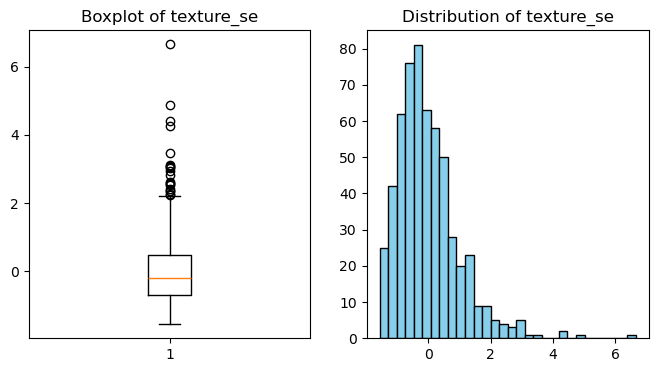

perimeter_se: 38 outliers detected


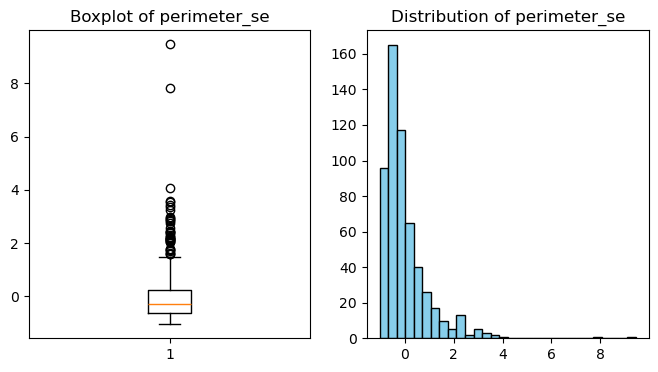

area_se: 65 outliers detected


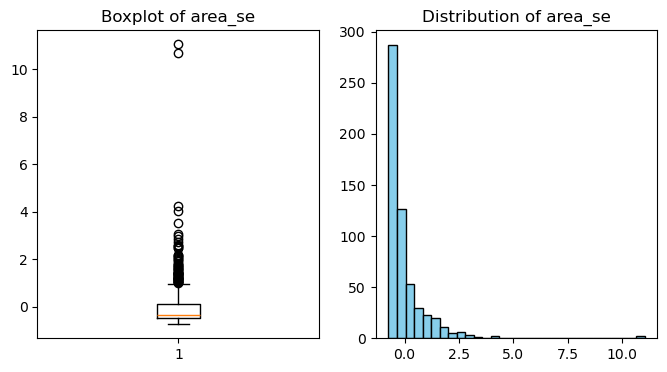

radius_worst: 17 outliers detected


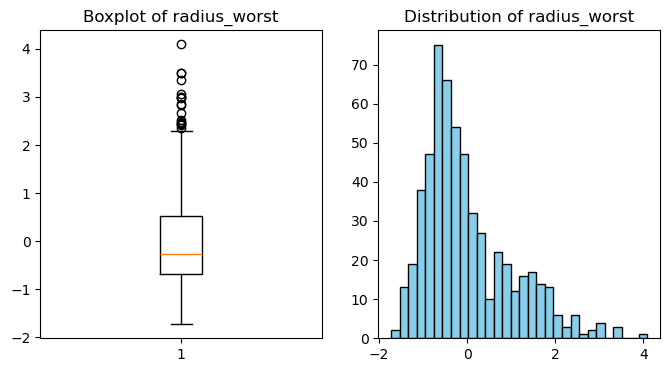

texture_worst: 5 outliers detected


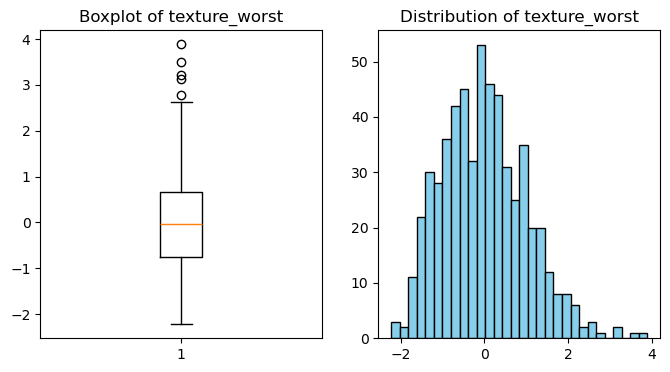

perimeter_worst: 15 outliers detected


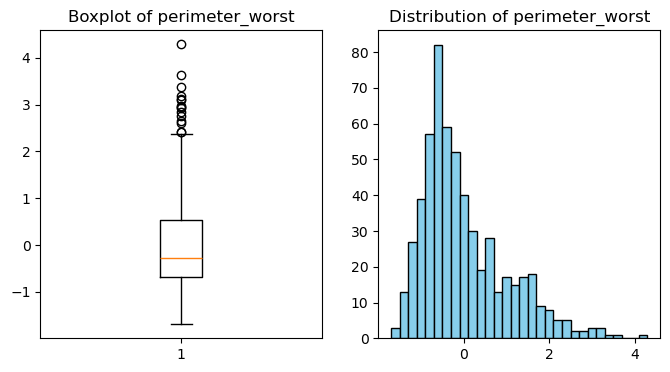

area_worst: 35 outliers detected


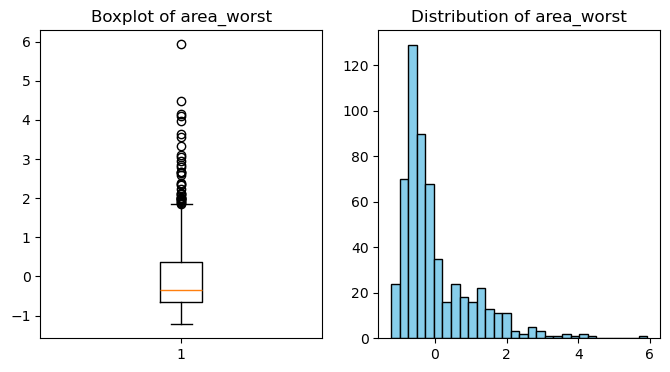

compactness_worst: 16 outliers detected


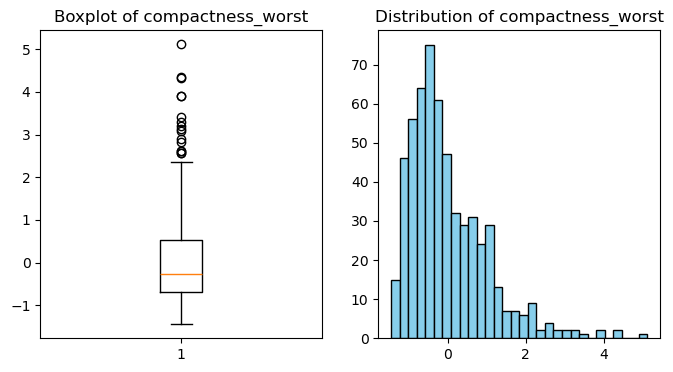

concavity_worst: 12 outliers detected


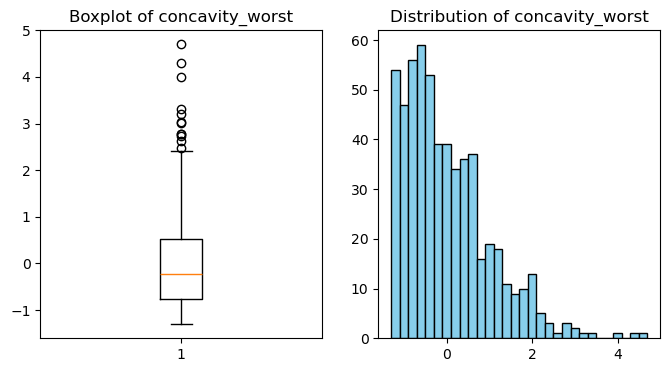


 Summary of detected outliers:
- radius_mean: 14 outliers
- texture_mean: 7 outliers
- perimeter_mean: 13 outliers
- area_mean: 25 outliers
- radius_se: 38 outliers
- texture_se: 20 outliers
- perimeter_se: 38 outliers
- area_se: 65 outliers
- radius_worst: 17 outliers
- texture_worst: 5 outliers
- perimeter_worst: 15 outliers
- area_worst: 35 outliers
- compactness_worst: 16 outliers
- concavity_worst: 12 outliers
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst']

 Numerical variables successfully normalized.


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,0.11840,0.27760,0.30010,0.14710,0.2419,...,1.886690,-1.359293,2.303601,2.001237,0.16220,2.616665,2.109526,0.2654,0.4601,0.11890
1,1,1.829821,-0.353632,1.685955,1.908708,0.08474,0.07864,0.08690,0.07017,0.1812,...,1.805927,-0.369203,1.535126,1.890489,0.12380,-0.430444,-0.146749,0.1860,0.2750,0.08902
2,1,1.579888,0.456187,1.566503,1.558884,0.10960,0.15990,0.19740,0.12790,0.2069,...,1.511870,-0.023974,1.347475,1.456285,0.14440,1.082932,0.854974,0.2430,0.3613,0.08758
3,1,-0.768909,0.253732,-0.592687,-0.764464,0.14250,0.28390,0.24140,0.10520,0.2597,...,-0.281464,0.133984,-0.249939,-0.550021,0.20980,3.893397,1.989588,0.2575,0.6638,0.17300
4,1,1.750297,-1.151816,1.776573,1.826229,0.10030,0.13280,0.19800,0.10430,0.1809,...,1.298575,-1.466770,1.338539,1.220724,0.13740,-0.313395,0.613179,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,2.110995,0.721473,2.060786,2.343856,0.11100,0.11590,0.24390,0.13890,0.1726,...,1.901185,0.117700,1.752563,2.015301,0.14100,-0.273318,0.664512,0.2216,0.2060,0.07115
565,1,1.704854,2.085134,1.615931,1.723842,0.09780,0.10340,0.14400,0.09791,0.1752,...,1.536720,2.047399,1.421940,1.494959,0.11660,-0.394820,0.236573,0.1628,0.2572,0.06637
566,1,0.702284,2.045574,0.672676,0.577953,0.08455,0.10230,0.09251,0.05302,0.1590,...,0.561361,1.374854,0.579001,0.427906,0.11390,0.350735,0.326767,0.1418,0.2218,0.07820
567,1,1.838341,2.336457,1.982524,1.735218,0.11780,0.27700,0.35140,0.15200,0.2397,...,1.961239,2.237926,2.303601,1.653171,0.16500,3.904848,3.197605,0.2650,0.4087,0.12400


In [198]:
def detect_outliers_and_normalize(data, numerical_cols):
    print(" Detecting outliers and visualizing the distribution of numerical variables:\n")
    print(numerical_cols)
    outliers_info = {}

    for col in numerical_cols:
        # Calculate the Interquartile Range (IQR)
        Q1 = data[col].quantile(0.25)  # First quartile
        Q3 = data[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        num_outliers = len(outliers)
        outliers_info[col] = num_outliers

        # Display outlier information
        print(f"{col}: {num_outliers} outliers detected")

        # Visualize the variable distribution with a boxplot
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.boxplot(data[col])
        plt.title(f'Boxplot of {col}')

        # Visualize with a histogram
        plt.subplot(1, 2, 2)
        plt.hist(data[col], bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {col}')

        plt.show()

    print("\n Summary of detected outliers:")
    for col, count in outliers_info.items():
        print(f"- {col}: {count} outliers")

    # Normalize numerical variables with StandardScaler
    print(numerical_cols)
    scaler = StandardScaler()
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

    print("\n Numerical variables successfully normalized.")

    return data
detect_outliers_and_normalize(data, numerical_cols)

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5